# import library

In [1]:
import re
import requests
from datetime import datetime
from bs4 import BeautifulSoup, Tag
from time import gmtime, strftime

import newspaper
from newspaper import Article
from konlpy.tag import Okt
from wordcloud import WordCloud
import newspaper
import feedparser
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

#### import module

In [3]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%98&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=19&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}'

In [4]:

def get_soup(url, headers=None):
    """
    Arguments
    ---------
    url : str
        Web page url
    headers : dict
        Headers for requests. If None, use Mozilla/5.0 as default user-agent

    Returns
    -------
    soup : bs4.BeautifulSoup
        Soup format web page
    """

    if headers is None:
        headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'}
    r = requests.get(url, headers=headers)
    html = r.text
    page = BeautifulSoup(html, 'lxml')
    return page

#### url 수집

In [5]:
urls = []
for page in range(10):
    temp_url = url.format(page*10 +1)
    soup = get_soup(url)
    urls += [a.find('a', class_= 'news_tit')['href'] 
            for a in soup.find_all('div', class_='news_area')]

In [6]:
len(urls), urls

(100,
 ['http://mbn.mk.co.kr/pages/news/newsView.php?category=mbn00009&news_seq_no=4681579',
  'http://yna.kr/AKR20220117000800085?did=1195m',
  'https://biz.chosun.com/topics/topics_social/2022/01/17/M2KOJAG46ZE4HP3R5CWLNISF4Y/?utm_source=naver&utm_medium=original&utm_campaign=biz',
  'http://www.fnnews.com/news/202201171014533210',
  'https://view.asiae.co.kr/article/2022011710191303150',
  'https://news.kbs.co.kr/news/view.do?ncd=5374298&ref=A',
  'http://www.newsis.com/view/?id=NISX20220117_0001726608&cID=10434&pID=13100',
  'http://www.bloter.net/newsView/blt202201170040',
  'http://news.tvchosun.com/site/data/html_dir/2022/01/17/2022011790051.html',
  'http://sports.khan.co.kr/news/sk_index.html?art_id=202201171638003&sec_id=520201&pt=nv',
  'http://mbn.mk.co.kr/pages/news/newsView.php?category=mbn00009&news_seq_no=4681579',
  'http://yna.kr/AKR20220117000800085?did=1195m',
  'https://biz.chosun.com/topics/topics_social/2022/01/17/M2KOJAG46ZE4HP3R5CWLNISF4Y/?utm_source=naver&utm_

#### 기사 수집

In [7]:
temp = []
for ln in urls:
    article = newspaper.Article(ln, language ="ko")
    article.download()
    article.parse()
    temp.append(article.text)

In [8]:
okt = Okt()
txt = ' '.join(temp)

In [9]:
from nltk import Text
nouns = [a for a in okt.nouns(txt)]
noun = Text(nouns)
font_path = "c:/Windows/Fonts/malgun.ttf"


#### 빈도수

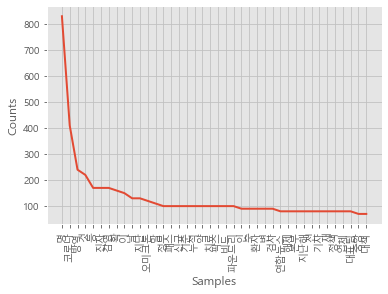

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
nounnum = noun.vocab()
nounnum.plot(40)

#### wordcloud

(-0.5, 999.5, 599.5, -0.5)

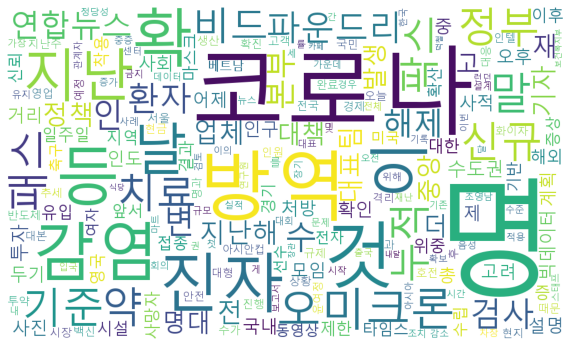

In [11]:
wc = WordCloud(width = 1000, height = 600, background_color= "white", font_path = font_path)
gen = wc.generate_from_frequencies(noun.vocab())
plt.figure(figsize= (10,8))
plt.imshow(gen)
plt.axis('off') # 테두리 x축  y 축 제거